---
<a href="https://colab.research.google.com/github/hc2x/civl7740/blob/main/tutorial-pca-basics.ipynb" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>

# Instruction for Google Colab environment
- In order to make edits to this notebook, you should press File > "Save a Copy in Drive". This will ensure that any edits will be on your local copy, and they will not affect the notebook shared with everyone else.
- Click "Connect" on the top-right corner. Once you see RAM and Disk, you are ready to run the codes!
---

# Empirical Orthogonal Function (EOF) Analysis (or Eigenvector Decomposition)
Prepared by Donghoon Lee (Donghoon.Lee@umanitoba.ca)

### 1. Concept

Empirical Orthogonal Function (EOF) analysis is a statistical method used to identify
dominant patterns of variability in multivariate datasets (e.g., climate, ocean, or atmospheric data).

Mathematically, it is equivalent to performing **eigenvector decomposition**
(or **Principal Component Analysis, PCA**) on the **covariance** or **correlation matrix** of the data.

---

### 2. Starting from the Data Matrix

Assume we have a mean-centered data matrix:

$$
\mathbf{X} =
\begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1p} \\
x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}
$$

where:
- $n$ = number of observations (e.g., time steps)
- $p$ = number of variables (e.g., spatial points)

The covariance matrix is:

$$
\mathbf{\Sigma} = \frac{1}{n - 1} \mathbf{X}^T \mathbf{X}
$$

---

### 3. Eigen Decomposition

The covariance matrix $\mathbf{\Sigma}$ can be decomposed as:

$$
\mathbf{\Sigma} \mathbf{E} = \mathbf{E} \mathbf{\Lambda}
$$

where:
- $\mathbf{E}$ = matrix of **eigenvectors** (EOFs)
- $\mathbf{\Lambda}$ = diagonal matrix of **eigenvalues**

Each eigenvalue $\lambda_i$ represents the **variance explained** by the $i$-th eigenvector (EOF mode).

---

### 4. Principal Components (Time Series)

The **principal component (PC)** time series are obtained by projecting the data onto the eigenvectors:

$$
\mathbf{T} = \mathbf{X} \mathbf{E}
$$

- Columns of $\mathbf{T}$ are the PC time series.  
- Each column corresponds to the temporal evolution of one EOF spatial pattern.

---

### 5. Variance Explained

The fraction of total variance explained by the $i$-th EOF mode is:

$$
f_i = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}
$$

---

### 6. Reconstruction

The original dataset can be approximately reconstructed from the first $k$ EOF modes:

$$
\mathbf{X} \approx \mathbf{T}_k \mathbf{E}_k^T
$$

where:
- $\mathbf{T}_k$ = first $k$ principal component time series  
- $\mathbf{E}_k$ = first $k$ eigenvectors (EOFs)

---

### 7. Summary

| Term | Meaning |
|------|----------|
| $\mathbf{\Sigma}$ | Covariance or correlation matrix |
| $\mathbf{E}$ | Eigenvectors (EOF spatial patterns) |
| $\mathbf{\Lambda}$ | Eigenvalues (variance explained) |
| $\mathbf{T}$ | Principal component time series |
| $f_i$ | Fraction of total variance explained |

---

### 8. Interpretation

- Each **EOF** represents an orthogonal spatial pattern in the data.  
- The corresponding **PC** represents the temporal evolution of that pattern.  
- The leading EOFs capture the **dominant modes of variability** in the system.

where:
- $\mathbf{T}_k$ = first $k$ principal components  
- $\mathbf{E}_k$ = first $k$ eigenvectors (EOF patterns)

---

### 7. Summary

| Term | Meaning |
|------|----------|
| $\mathbf{C}$ | Covariance or correlation matrix |
| $\mathbf{E}$ | Eigenvectors (EOF spatial patterns) |
| $\mathbf{\Lambda}$ | Eigenvalues (variance explained) |
| $\mathbf{T}$ | Principal component time series |
| $f_i$ | Fraction of total variance explained |

---

### 8. Interpretation

- Each **EOF** represents an orthogonal spatial pattern in the data.  
- The corresponding **PC** represents the temporal evolution of that pattern.  
- The first few EOFs typically capture the **most significant modes of variability**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd, eigh

# Load A.1 table: Daily precipitation (inches) and temperature (F) observations at Ithaca and Canandaigua, New York, for January 1987.)
df = pd.read_csv('https://raw.githubusercontent.com/hc2x/civl7740/refs/heads/main/APPENDIX_A1.csv', header=[0,1], index_col=0)
ith, can = df['Ithaca'], df['Canandaigua']
df.head()

Ithaca                       Canandaigua                    
Date Precipitation Max Temp. Min Temp. Precipitation Max Temp. Min Temp.
1             0.00        33        19          0.00        34        28
2             0.07        32        25          0.04        36        28
3             1.11        30        22          0.84        30        26
4             0.00        29        -1          0.00        29        19
5             0.00        25         4          0.00        30        16

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


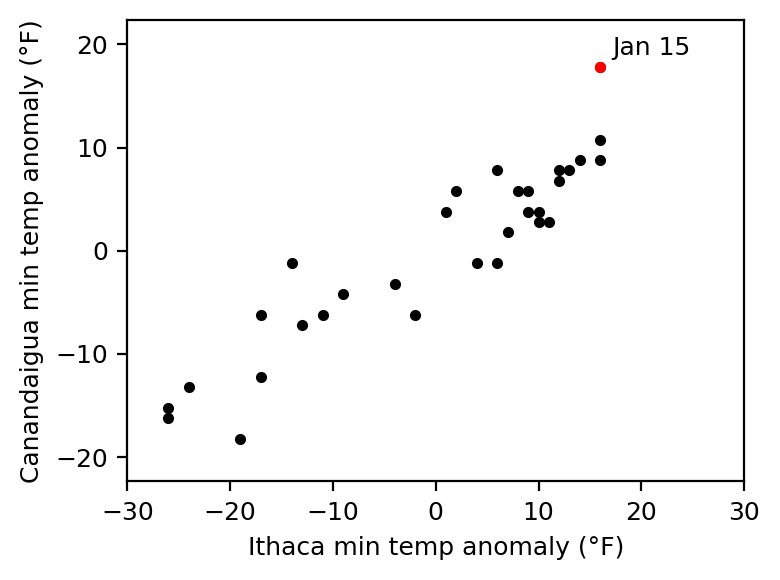

January 15, 1987 min temp anomalies (°F): Ithaca = 16.0, Canandaigua = 17.8


In [2]:
data = np.array([ith['Min Temp.'], can['Min Temp.']]).T
data_anom = data - np.mean(data, axis=0)
X = data_anom
x_jan15 = X[14, :]

# Scatter Plot
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
ax.plot(X[:, 0], X[:, 1], '.k')
ax.plot(x_jan15[0], x_jan15[1], '.r', label='Jan 15, 1987')
ax.set_xlabel('Ithaca min temp anomaly (°F)', fontsize=9)
ax.set_ylabel('Canandaigua min temp anomaly (°F)', fontsize=9)
ax.text(x_jan15[0]+1.2, x_jan15[1]+1.2, "Jan 15", fontsize=9)
ax.axis('equal')
ax.set_xlim(-30, 30)
ax.set_ylim(-20, 30)
ax.set_xticks(np.arange(-30, 31, 10))
ax.set_yticks(np.arange(-30, 31, 10))
ax.tick_params(axis='both', labelsize=9)
plt.tight_layout()
plt.show()
print("January 15, 1987 min temp anomalies (°F): Ithaca = {:.1f}, Canandaigua = {:.1f}".format(x_jan15[0], x_jan15[1]))

## Eigenvector Decomposition (or Empirical Orthogonal Function (EOF) analysis)


In [3]:
# Covariance matrix
COV = np.cov(X, rowvar=False)
# Eigen decomposition of covariance matrix
eigvals, eigvecs = eigh(COV)
order = np.argsort(eigvals)[::-1]
eigvals = eigvals[order]
eigvecs = -eigvecs[:, order]
LAMBDA = np.diag(eigvals)
E1, E2 = eigvecs[:, 0], eigvecs[:, 1]
LAMBDA1, LAMBDA2 = eigvals[0], eigvals[1]
print('Covariance matrix')
print(COV)
print('Eigenvector matrix')
print(eigvecs)
print('Eigenvalues')
print(eigvals)

Covariance matrix
[[185.46666667 110.8       ]
 [110.8         77.58064516]]
Eigenvector matrix
[[ 0.84785912 -0.53022156]
 [ 0.53022156  0.84785912]]
Eigenvalues
[254.75712705   8.29018477]


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


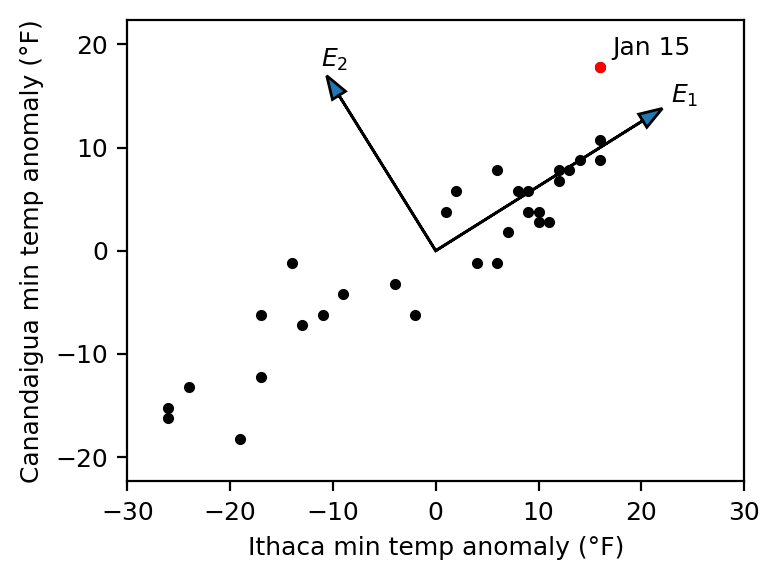

In [4]:
# Scatter Plot
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
ax.plot(X[:, 0], X[:, 1], '.k')
ax.plot(x_jan15[0], x_jan15[1], '.r', label='Jan 15, 1987')
ax.set_xlabel('Ithaca min temp anomaly (°F)', fontsize=9)
ax.set_ylabel('Canandaigua min temp anomaly (°F)', fontsize=9)
ax.text(x_jan15[0]+1.2, x_jan15[1]+1.2, "Jan 15", fontsize=9)
ax.axis('equal')
ax.set_xlim(-30, 30)
ax.set_ylim(-20, 30)
ax.set_xticks(np.arange(-30, 31, 10))
ax.set_yticks(np.arange(-30, 31, 10))
ax.tick_params(axis='both', labelsize=9)

# E1, E2 Arrows
scale = 20.0
ax.arrow(0, 0, scale*E1[0]*1.3, scale*E1[1]*1.3, head_width=1.5, length_includes_head=True)
ax.arrow(0, 0, scale*E2[0], scale*E2[1], head_width=1.5, length_includes_head=True)
ax.text(scale*E1[0]*1.35, scale*E1[1]*1.35, r"$E_1$", fontsize=9)
ax.text(scale*E2[0]*1.05, scale*E2[1]*1.05, r"$E_2$", fontsize=9)

plt.tight_layout()
plt.show()

## Definition of PCA

Principal Component Analysis (PCA) reduces a data set containing a large number of variables to a data set containing fewer (hopefully many fewer) new variables. These new variables are linear combinations of the original ones, and these linear combinations are chosen to represent the maximum possible fraction of the variability contained in the original data. That is, given multiple observations of a ($K \times 1$) data vector $x$, PCA finds ($M \times 1$) vectors $u$ whose elements are linear combinations of the elements of the $x'$s, and which contain most of the information in the original collection of $x'$s. PCA is most effective when this data compression can be achieved with $M<< K$. This situation occurs when there are substantial correlations among the variables within $x$, in which case $x$ contains redundant information. The elements of these new vectors **$u$** are called the principal components (PCs).

### Analysis formula

Transformation of data vecter $X'$ (centered data; anomaly) to a vector $u$ of PCs
> $$
u_m = e_m^T x'
$$

the $m$th principal component, $u_m$, is obtained as the projection of the data vector $x'$ onto the $m$th eigenvector, $e_m$,

> $$
u = [E]^T x'
$$

$[E]$ is the orthogonal matrix whose columns are the eigenvectors.

### Synthesis formula

Reconstruction of $x'$ from the PCs

> $$
x' = [E]u
$$




In [5]:
# Transformation of minimum temperature on January 15
PX = X[14, :].reshape(-1, 1)
PU1 = np.dot(E1.T, PX)
PU2 = np.dot(E2.T, PX)
PU = np.dot(eigvecs.T, PX)
print(PU)

[[22.99000666]
 [ 6.58646719]]


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


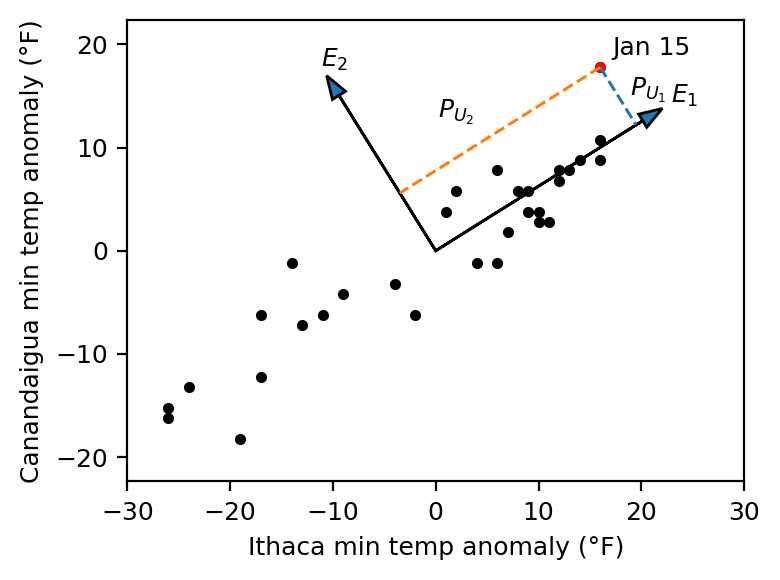

In [6]:
# Scatter Plot
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
ax.plot(X[:, 0], X[:, 1], '.k')
ax.plot(x_jan15[0], x_jan15[1], '.r', label='Jan 15, 1987')
ax.set_xlabel('Ithaca min temp anomaly (°F)', fontsize=9)
ax.set_ylabel('Canandaigua min temp anomaly (°F)', fontsize=9)
ax.text(x_jan15[0]+1.2, x_jan15[1]+1.2, "Jan 15", fontsize=9)
ax.axis('equal')
ax.set_xlim(-30, 30)
ax.set_ylim(-20, 30)
ax.set_xticks(np.arange(-30, 31, 10))
ax.set_yticks(np.arange(-30, 31, 10))
ax.tick_params(axis='both', labelsize=9)

# E1, E2 Arrows
scale = 20.0
ax.arrow(0, 0, scale*E1[0]*1.3, scale*E1[1]*1.3, head_width=1.5, length_includes_head=True)
ax.arrow(0, 0, scale*E2[0], scale*E2[1], head_width=1.5, length_includes_head=True)
ax.text(scale*E1[0]*1.35, scale*E1[1]*1.35, r"$E_1$", fontsize=9)
ax.text(scale*E2[0]*1.05, scale*E2[1]*1.05, r"$E_2$", fontsize=9)

# Jan 15 projection lines
u1 = PU1.flatten()
u2 = PU2.flatten()
e1 = E1
e2 = E2 
p1 = u1 * e1
p2 = u2 * e2
ax.plot([x_jan15[0], p1[0]], [x_jan15[1], p1[1]], linestyle="--", linewidth=1.1)
ax.plot([x_jan15[0], p2[0]], [x_jan15[1], p2[1]], linestyle="--", linewidth=1.1)
# annotations with projected points
ax.text((x_jan15[0]+p1[0])/2+1.2, (x_jan15[1]+p1[1])/2, r"$P_{U_1}$", fontsize=9)
ax.text((x_jan15[0]+p2[0])/2-6.0, (x_jan15[1]+p2[1])/2+1.2, r"$P_{U_2}$", fontsize=9)

plt.tight_layout()
plt.show()

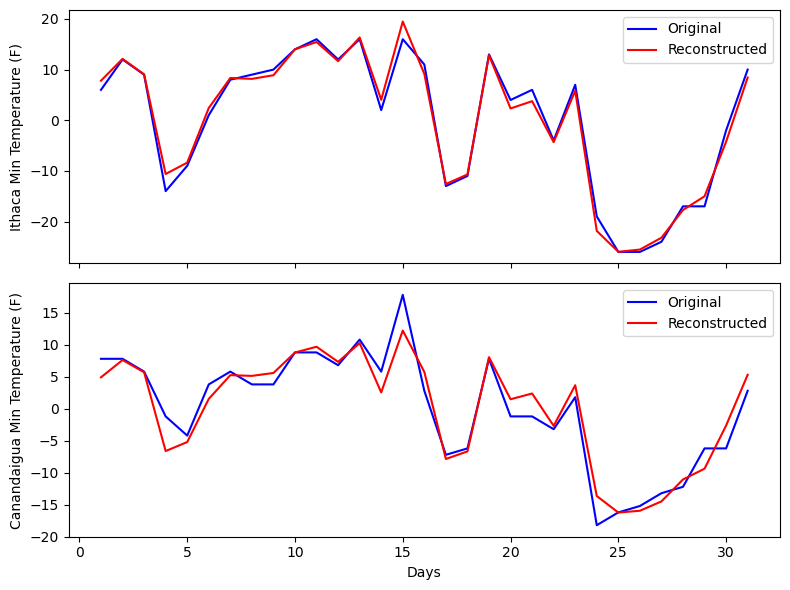

In [7]:
# All data transformed to principal components
PC = np.dot(X, eigvecs)
PC1 = PC[:, 0]

# Reconstruction of PC1
RX = np.outer(PC1, E1)

# Plotting original and reconstructed data
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
axes[0].plot(range(1, 32), X[:, 0], label='Original', color='b')
axes[0].plot(range(1, 32), RX[:, 0], label='Reconstructed', color='r')
axes[0].legend()
axes[0].set_ylabel('Ithaca Min Temperature (F)')
axes[1].plot(range(1, 32), X[:, 1], label='Original', color='b')
axes[1].plot(range(1, 32), RX[:, 1], label='Reconstructed', color='r')
axes[1].legend()
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Canandaigua Min Temperature (F)')
plt.tight_layout()
plt.show()

In [8]:
# Verification
dot_product = np.dot(PX.T, PU)
angle = np.arccos(dot_product / (np.sqrt(np.dot(PX.T, PX)) * np.sqrt(np.dot(PU.T, PU))))
angle1 = np.degrees(angle)
angle2 = np.degrees(np.arccos(E1[0]))
angle3 = np.degrees(np.arccos(E2[0]))
print(angle1, angle2, angle3)

[[32.02042611]] 32.02042610877154 122.02042610877153


In [9]:
# Covariance matrix
COV = np.cov(X, rowvar=False)
# Correlation matrix
COR = np.corrcoef(X, rowvar=False)

# Verification
dot_product = np.dot(PX.T, PU)
angle = np.arccos(dot_product / (np.sqrt(np.dot(PX.T, PX)) * np.sqrt(np.dot(PU.T, PU))))
angle1 = np.degrees(angle)
angle2 = np.degrees(np.arccos(E1[0]))

# # Variance verification
# VAR1 = COV[[0, 3]]
# VAR2 = np.var(PC, axis=0)
# VAR3 = eigvals

# SVAR1 = np.sum(COV[[0, 3]])
# SVAR2 = np.sum(np.var(PC, axis=0))
# SVAR3 = np.sum(eigvals)

# Performance of PCs
R1 = LAMBDA1 / np.sum(eigvals) * 100
R2 = LAMBDA2 / np.sum(eigvals) * 100

# Singular Value Decomposition (SVD)
L1, O1, R1 = svd(X / np.sqrt(len(X) - 1), full_matrices=False)
R1[:, 0] *= -1
L1[:, 0] *= -1

V2 = O1**2
E2 = R1
PC2 = np.sqrt(len(X) - 1) * np.dot(L1, O1)

# Covariance matrix SVD
L2, O2, R2 = svd(COV, full_matrices=False)

# Correlation vs. Covariance Based PCA for Scaled Variables
data1_full = data[:, 1:]
data_anom_full = data1_full - np.mean(data1_full, axis=0)
X1 = data_anom_full
X2 = (data1_full - np.mean(data1_full, axis=0)) / np.std(data1_full, axis=0)

# PCA for Covariance
eigvals1, eigvecs1 = eigh(np.cov(X1, rowvar=False))
order1 = np.argsort(eigvals1)[::-1]
eigvals1 = eigvals1[order1]
eigvecs1 = -eigvecs1[:, order1]
R_CUM1 = np.cumsum(eigvals1 / np.sum(eigvals1)) * 100

# PCA for Correlation
eigvals2, eigvecs2 = eigh(np.cov(X2, rowvar=False))
order2 = np.argsort(eigvals2)[::-1]
eigvals2 = eigvals2[order2]
eigvecs2 = -eigvecs2[:, order2]
R_CUM2 = np.cumsum(eigvals2 / np.sum(eigvals2)) * 100

ValueError: expected square "a" matrix

In [ ]:
X1